In [8]:
import numpy as np
k = 100

In [9]:
from scipy.stats import norm
from math import sqrt
mu = k/2
sig = sqrt(k/4)
def prb(i):
    return norm.cdf( (i + 1/2 - mu)/sig ) - norm.cdf( (i - 1/2 - mu)/sig )
hyp = [prb(i) for i in range(k+1)]

In [10]:
M = np.zeros((k+1, k+1))
for i in range(k+1):
    if i < k:
        M[i+1, i] = (k-i)/k
    if i > 0:
        M[i-1, i] = i/k

In [11]:
from numpy.linalg import eig
w, v = eig(M)
for i, lam in enumerate(w):
    if lam > 0.99 and lam < 1.01:
        d = v[:, i]
        d /= sum(d)

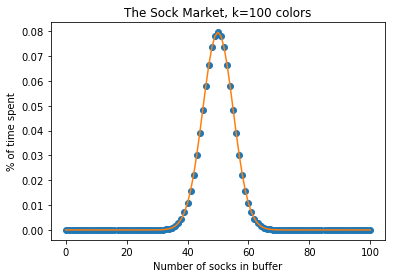

In [12]:
import matplotlib.pyplot as plt
plt.title('The Sock Market, k=%d colors' % k)
plt.xlabel('Number of socks in buffer')
plt.ylabel('% of time spent')
plt.plot(d, 'o')
plt.plot(hyp)
plt.show()